Editado para la entrega
- Erick Alexei Cambray Servin
- A01794243

# Bienvenido al notebook
# Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [41]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.matmul(np.matmul(W, D), Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [6]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [58]:
def desc_recomp(mat):
    print(f'La matriz original es:\n{mat}')
    w, v = eig(mat)
    print(f'Los valores eigen son: \n{values}.\n \
        Sus vectores eigen son\n{vectors}\n')

    inv_vect = np.linalg.inv(v)
    diag_val = np.diag(w)
    
    rec = np.matmul(np.matmul(v, diag_val), inv_vect).round()
    
    print(f'La matriz reconstruida es:\n{rec}')
    

In [59]:
#Matriz 1
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
desc_recomp(A)

La matriz original es:
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
Los valores eigen son: 
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15].
         Sus vectores eigen son
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]

La matriz reconstruida es:
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]


In [60]:
#Matriz 2
A2 = array([[1,2,0], [3, 0, 0], [8, 0, 1]])
desc_recomp(A2)

La matriz original es:
[[1 2 0]
 [3 0 0]
 [8 0 1]]
Los valores eigen son: 
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15].
         Sus vectores eigen son
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]

La matriz reconstruida es:
[[ 1.  2.  0.]
 [ 3. -0.  0.]
 [ 8. -0.  1.]]


In [61]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
desc_recomp(A3)

La matriz original es:
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
Los valores eigen son: 
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15].
         Sus vectores eigen son
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]

La matriz reconstruida es:
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


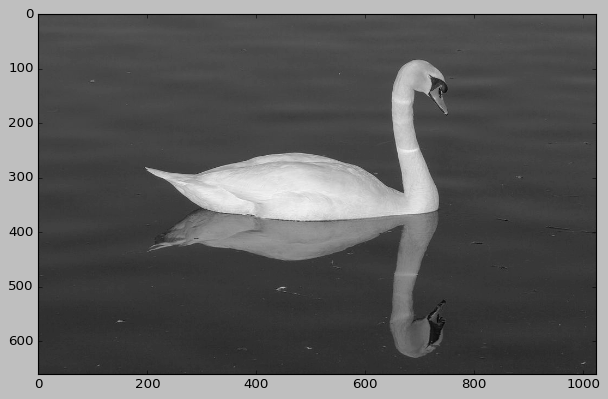

<PIL.Image.Image image mode=LA size=1024x660 at 0x13428929C60>


In [62]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [63]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [64]:
U.shape

(660, 660)

In [65]:
V.shape

(1024, 1024)

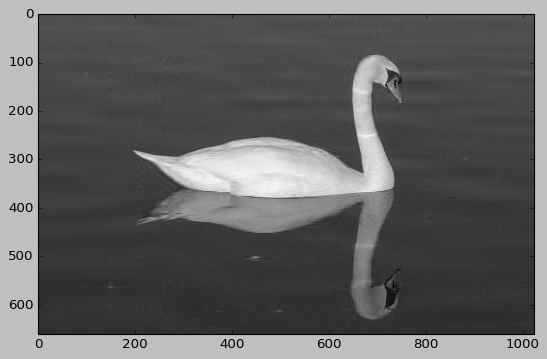

Felicidades la imagen está comprimida


In [66]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

In [96]:
import os
path = 'img_dim_red/'
photos = [x for x in os.listdir(path)]

def comp_img(img_path, nvalue= 50):
    print(f'La imagen original es:')
    plt.style.use('classic')
    img = Image.open(img_path).convert('LA')
    
    imggray = img.convert('LA')
    imgmat = np.array(list(imggray.getdata(band=0)),float)

    print(imgmat)

    imgmat.shape = (imggray.size[1],imggray.size[0])

    plt.figure(figsize=(9,6))
    plt.imshow(imgmat,cmap='gray')
    plt.show()
    print(img)

    U,D,V = np.linalg.svd(imgmat)

    print(f'Los valores son U: {U}, D: {D}, V: {V}')
    nvalue = 50
    
    reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

    print(f'La imagen comprimida es:')
    plt.imshow(reconstimg,cmap='gray')
    plt.show()
    




La imagen original es:
[156. 157. 160. ... 121. 113. 111.]


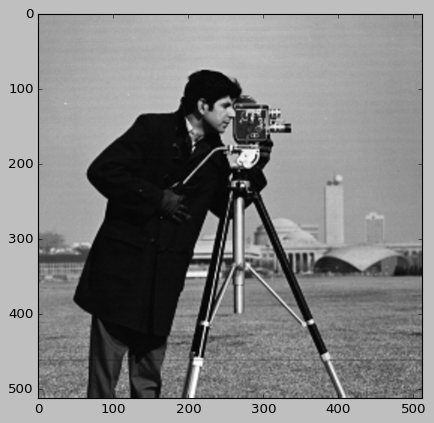

<PIL.Image.Image image mode=LA size=512x512 at 0x13428B30F10>
Los valores son U: [[-0.05847767 -0.06553692  0.01888191 ... -0.00580352  0.07703869
   0.00821728]
 [-0.05848071 -0.06549689  0.01886638 ...  0.01318767 -0.05726534
   0.1188272 ]
 [-0.05856715 -0.06526251  0.01848081 ... -0.00928702 -0.0090669
   0.01307604]
 ...
 [-0.03923074 -0.00938401  0.0351705  ... -0.08681618  0.10054943
  -0.06186647]
 [-0.03922994 -0.00910873  0.03487255 ...  0.05188289 -0.06544286
   0.04723944]
 [-0.03922453 -0.00935622  0.03524528 ... -0.00031939 -0.03500986
  -0.00725802]], D: [6.38689996e+04 1.44910897e+04 1.09561592e+04 6.19958837e+03
 5.85460599e+03 4.82514545e+03 4.59023130e+03 3.61148738e+03
 3.34731861e+03 3.14349896e+03 3.05262875e+03 2.95922014e+03
 2.84709763e+03 2.81972262e+03 2.53580358e+03 2.35379736e+03
 2.25234388e+03 2.19445315e+03 1.95347281e+03 1.93643231e+03
 1.78576072e+03 1.68444543e+03 1.55985334e+03 1.53124809e+03
 1.49461049e+03 1.46783730e+03 1.37841479e+03 1.31705840e+

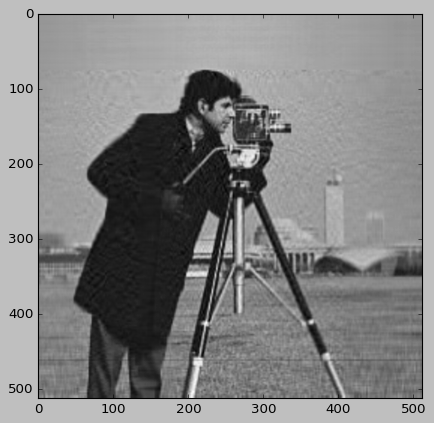

In [97]:
#imagen 1
comp_img(path+photos[0])

La imagen original es:
[162. 161. 159. ... 101. 102. 106.]


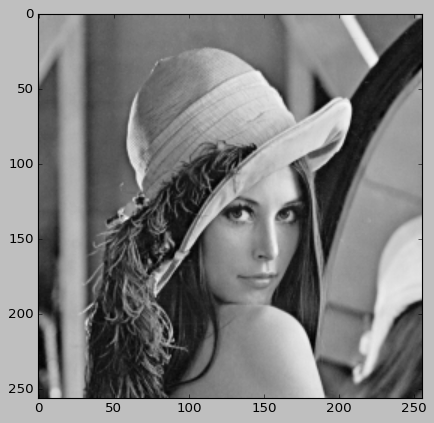

<PIL.Image.Image image mode=LA size=256x256 at 0x13428AC95A0>
Los valores son U: [[-6.70124718e-02 -3.95046588e-02 -2.15282188e-02 ... -2.75641485e-02
   3.54688646e-02 -7.07106781e-01]
 [-6.70124718e-02 -3.95046588e-02 -2.15282188e-02 ... -2.75641485e-02
   3.54688646e-02  7.07106781e-01]
 [-6.66185210e-02 -4.01077222e-02 -1.95373499e-02 ...  2.61034109e-02
  -6.70639225e-02  5.67516484e-14]
 ...
 [-5.89376871e-02 -6.84212417e-02  3.35657040e-02 ...  1.32015697e-01
   4.06002598e-02  2.16451856e-13]
 [-5.89563601e-02 -6.86053881e-02  3.08995819e-02 ...  2.96190806e-03
   6.42018608e-03  3.36952688e-14]
 [-5.90709606e-02 -6.79395929e-02  2.88112835e-02 ... -1.08406809e-01
   5.41107965e-03 -1.34336986e-13]], D: [3.22729920e+04 5.29420795e+03 4.08247288e+03 3.23314360e+03
 2.93282209e+03 2.76921259e+03 2.28446682e+03 2.03410296e+03
 1.67753456e+03 1.57348210e+03 1.32199697e+03 1.20892273e+03
 1.19007479e+03 1.15091793e+03 1.07641145e+03 1.05854825e+03
 1.02693753e+03 9.02223740e+02 8.45

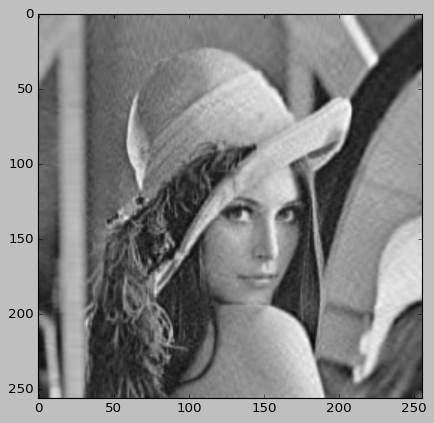

In [98]:
#imagen 2
comp_img(path+photos[1])

La imagen original es:
[138.  49.  47. ...  71.  73.  60.]


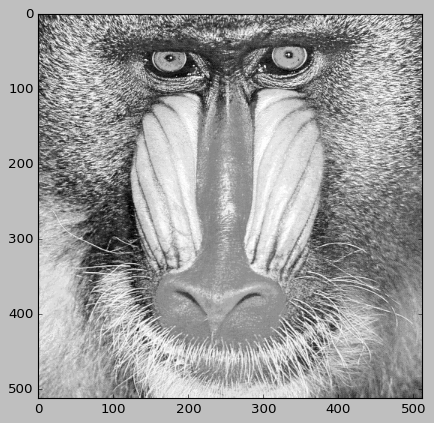

<PIL.Image.Image image mode=LA size=512x512 at 0x1342C47D630>
Los valores son U: [[-4.21650092e-02 -2.79191052e-02  3.46569930e-02 ...  2.60106638e-02
   3.94999502e-02  1.15826083e-12]
 [-4.06888022e-02 -2.66787121e-02  3.77308316e-02 ... -2.64144317e-02
  -6.27248558e-02 -1.96963378e-12]
 [-4.01425095e-02 -3.20206474e-02  3.90922850e-02 ...  1.68364900e-02
   5.22272814e-02  1.65877250e-12]
 ...
 [-4.81773843e-02  4.53279544e-02 -3.65058535e-02 ... -8.53503378e-02
  -2.57164314e-02 -2.78911626e-13]
 [-4.78360376e-02  4.68500928e-02 -3.58812230e-02 ...  1.35419144e-03
   2.27812680e-02  7.07106781e-01]
 [-4.78360376e-02  4.68500928e-02 -3.58812230e-02 ...  1.35419143e-03
   2.27812681e-02 -7.07106781e-01]], D: [6.32821933e+04 9.73121546e+03 6.25761898e+03 4.46833168e+03
 3.65329747e+03 3.05141722e+03 2.72375246e+03 2.47189963e+03
 2.37384872e+03 2.22204583e+03 2.16574064e+03 2.00631108e+03
 1.95126281e+03 1.84082905e+03 1.82180268e+03 1.78433402e+03
 1.77373771e+03 1.71403336e+03 1.67

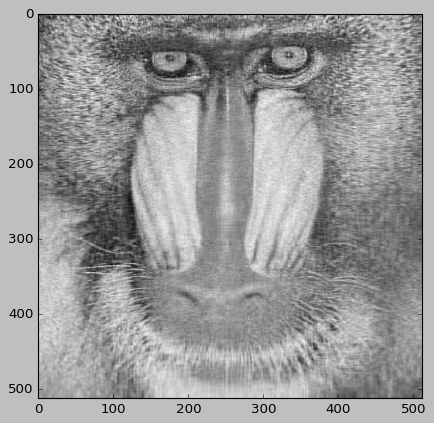

In [99]:
#imagen 3
comp_img(path+photos[2])

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




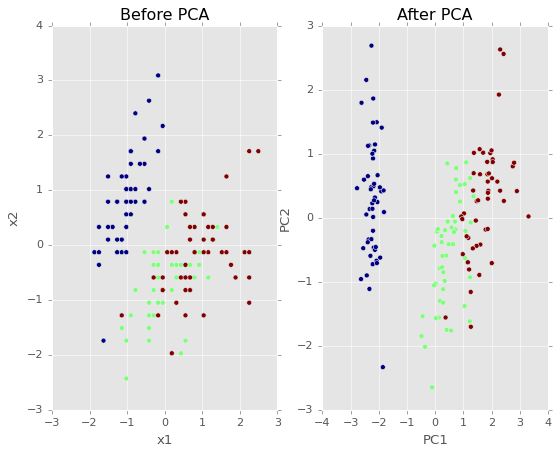

La variación que explica cada variable es :[0.72962445 0.22850762], en total 0.9581320720000164


In [107]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

# Grafica
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

print(f'La variación que explica cada variable es :{pca.explained_variance_ratio_}, en total {sum(pca.explained_variance_ratio_)}')


Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Fue mucho más claro poder ver como es que fuciona PCA después de ver los ejemplos y ver que la descomposiciónes diferente de las variables que no había notado hasta verlo visualmente también que veo que la forma en la que mantiene los datos con las imagenes.

Pero también como el SVD es tan útil y en imagenes me soreprende lo bien que mantiene la imagen pero siendo comprimida. Muy útil para el procesamiento de imágenes.

# Preguntas

¿Qué es feature importance y para que nos sirve?
- Dentro de este tema es saber que es lo que explica del total de datos una columna o la combinación de algunas de ellas como por ejemplo en SVD al ser ordenadas su matriz en importancia con las Sigmas de cada una de las columnas ya de la matriz nos dice que podemos explicar una matriz en menor escala o con menor información pero sin perder sus propiedades, esto es importante para poder hacer más eficientes los modelos ya que como hemos visto muchos toman en cuenta para su ooptimización el número de columnas que se usan y no tanto el número de filas. Pero ya tenemos una forma de análizarlo.

¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
- Lo más importante es ver que se puede explicar con menos información la misma matriz y esto permite poder jerarquizar la información y poder obviar los detalles para así concentrarnos en la imagen más grande.

¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
- Lo aplicaría con lo que sé en poder reducir las dimensiones de una modelo de predicción de regresión lineal ya que este modelo aumenta su complejidad con el número de columnas que se toman para hacer la predicción.